### Two Sample Test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from statsmodels.stats import weightstats  #Z test
import scipy.stats as stats # t-test (It does not have z test option) ******** Remember it

# Two Sample Z test

Ho:mean of machine 1 =mean of machine 2

Ha:mean of machine 1 !=mean of machine 2

In [2]:
df=pd.read_csv('TwoMachines.csv')
df

,Volume,Machine
0,154.27,Machine 1
1,150.03,Machine 1
2,151.14,Machine 1
3,145.47,Machine 1
4,149.71,Machine 1
...,...,...
195,152.05,Machine 2
196,151.41,Machine 2
197,153.76,Machine 2
198,150.75,Machine 2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Volume   200 non-null    float64
 1   Machine  200 non-null    object 
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [4]:
df.describe()

,Volume
count,200.000000
mean,151.538350
std,2.180823
min,145.440000
25%,150.015000
50%,151.515000
75%,153.110000
max,156.230000


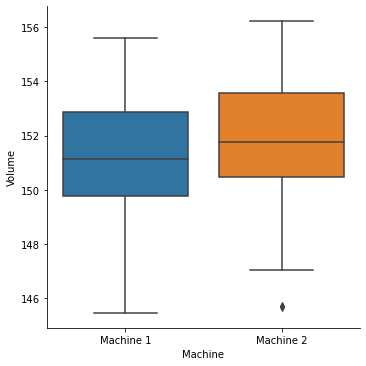

In [5]:
sns.catplot(data=df,x='Machine', y='Volume', kind='box')

# Capture the mean of machine of machine 1 and machine 2 

In [6]:
m1=df[df['Machine']=='Machine 1']['Volume']
m2=df[df['Machine']=='Machine 2']['Volume']

In [7]:
m1

0     154.27
1     150.03
2     151.14
3     145.47
4     149.71
       ...  
95    152.85
96    151.03
97    152.08
98    152.29
99    148.18
Name: Volume, Length: 100, dtype: float64

In [8]:
m2

100    152.87
101    154.68
102    154.21
103    155.91
104    152.63
        ...  
195    152.05
196    151.41
197    153.76
198    150.75
199    147.80
Name: Volume, Length: 100, dtype: float64

In [9]:
m1.mean()


151.20390000000006

In [10]:
m2.mean()

151.87279999999998

In [11]:
m1 # mean volume of machine 1

0     154.27
1     150.03
2     151.14
3     145.47
4     149.71
       ...  
95    152.85
96    151.03
97    152.08
98    152.29
99    148.18
Name: Volume, Length: 100, dtype: float64

In [12]:
m2 # Mean volume of machine 2

100    152.87
101    154.68
102    154.21
103    155.91
104    152.63
        ...  
195    152.05
196    151.41
197    153.76
198    150.75
199    147.80
Name: Volume, Length: 100, dtype: float64

In [13]:
_,p_val=weightstats.ztest(m1,m2)
p_val
# Machines are different with 95% confidence interval
# reject the null hypothesis as p< significance level(alpha(0.05))

0.028567341032618248

# Two sample test on tips dataset

In [14]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [15]:
tips=sns.load_dataset('tips')

In [16]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [17]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [18]:
tips['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']

In [19]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

In [20]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

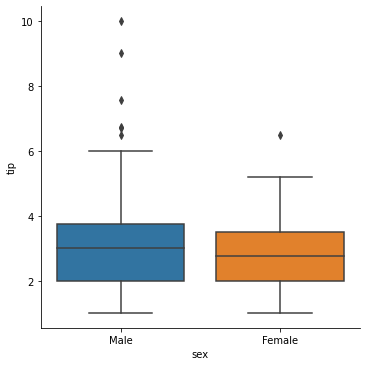

In [21]:
sns.catplot(data=tips, x='sex', y='tip', kind='box')

In [22]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [23]:
tm=tips[tips['sex']=='Male']['tip']
tf=tips[tips['sex']=='Female']['tip']

In [24]:
weightstats.ztest(tm,tf)
# Hypothesis:
# Ho: Both are paying same tip (tm=tf)
# Ha: tm!=tf
# alpha=0.05
#pvalue >alpha ,So, accept the null hypothesis

(1.3878597054212687, 0.1651797698624794)

Do the statistical test on time

# Two sample t test

Machine A: 150,152,154,152,151

Machine B: 156,155,158,155,154


Hypothesis:
Ho: ma=mb
Ha:ma!=mb

We are testing with 95% confidence interval

# Assuming the variance of the two samples are equal

In [25]:
m1=[150,152,154,152,151]
m2=[156,155,158,155,154]

In [26]:
stats.ttest_ind(m1,m2,equal_var=True)
# the p val= 0.0039  which is less than aplha value(0.05)
# we are rejecting the null hypotheiss

Ttest_indResult(statistic=-4.005551702879929, pvalue=0.003919295477128331)

# Assuming the variance of the two samples are not equal

machine 1=150,152,154,152,151

machine 3= 144,162,177,150,140


Hypothesis:
Ho: ma=mc
Ha:ma!=mc

We are testing with 95% confidence interval

In [27]:
m1=[150,152,154,152,151]
m3=[144,162,177,150,140]

In [28]:
stats.ttest_ind(m1,m3,equal_var=False)
# Accept the null hypothesis

Ttest_indResult(statistic=-0.4146442144313621, pvalue=0.699289145758865)

# Paired Ttest
*** It is done when samples are dpendent on each other

In [29]:
bp_before=[120,122,143,100,109]
bp_after=[122,120,141,109,109]

Ho: bp_before=bp_after



Ha: bp_before!=bp_after

In [30]:
stats.ttest_rel(bp_before,bp_after)
# Fail to reject Null Hypothesis.

Ttest_relResult(statistic=-0.6864064729836442, pvalue=0.5301776477578163)

In [31]:
norm.cdf(0.4)

0.6554217416103242

# 3. Two proportion Test


Ho: P1=P2 or P1-p2=0

Ha: P1!=P2

In [32]:
from statsmodels.stats import proportion

In [33]:
proportion.test_proportions_2indep(30,200,10,100)

# Pvalue says : Accept the Null Hypothesis

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 1.145433008876846
pvalue = 0.2520298311822946
compare = diff
method = agresti-caffo
diff = 0.04999999999999999
ratio = 1.4999999999999998
odds_ratio = 1.588235294117647
variance = 0.001586401953652147
alternative = two-sided
value = 0
tuple = (1.145433008876846, 0.2520298311822946)

# 4.Two Sample Variance Test

In [36]:
# We do not have direct function in scipy.stats
# we will first use python as calculator and find out the F calculated value

from scipy.stats import f

In [35]:
F_cal=11/1.21
F_cal

9.090909090909092

In [39]:
F_cri_right=f.isf(0.05, 4,7)
F_cri_right

4.120311726897633

In [40]:
F_cri_left=f.isf(0.95, 4,7)
F_cri_left

0.1640901524729093

## Bartlett Test for Variance check
## Link

In [41]:
m1=[150,150,151,148,151,152,149,150]
np.std(m1)

1.165922381636102

In [42]:
m2=[135,152,154,169,157]
np.std(m2)

10.9288608738514

In [43]:
stats.bartlett(m1,m2)
# Rejecting the null hypothesis of " variances are same "

BartlettResult(statistic=19.105727631632714, pvalue=1.2367317910523616e-05)

## Levene Test

In [44]:
stats.levene(m1,m2)

# Link

LeveneResult(statistic=5.416245804750017, pvalue=0.040060452607943706)

# When to use what?


# 5. ANOVA

In [45]:
from statsmodels.stats import oneway as oneway

In [46]:
m1=[150,151,152,152,151,150]
m2=[153,152,148,151,149,152]
m3=[156,154,155,156,157,155]

In [47]:
stats.f_oneway(m1,m2,m3)
# ---

F_onewayResult(statistic=22.264705882352935, pvalue=3.2374085509077445e-05)

# ANOVA on MPG dataset

In [48]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [62]:
mpg=sns.load_dataset('mpg')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [63]:
mpg.groupby('origin').mean()['mpg']

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

In [64]:
mpg.groupby(['origin','cylinders']).mean()['mpg']

origin  cylinders
europe  4            28.411111
        5            27.366667
        6            20.100000
japan   3            20.550000
        4            31.595652
        6            23.883333
usa     4            27.840278
        6            19.663514
        8            14.963107
Name: mpg, dtype: float64

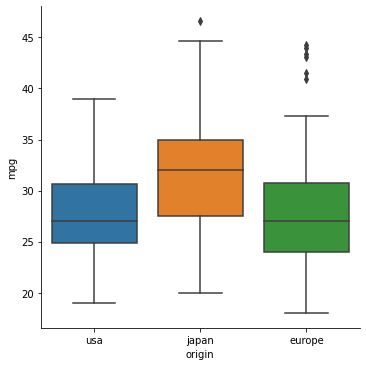

In [65]:
sns.catplot(data=mpg, x='origin', y= mpg[mpg['cylinders']==4]['mpg'], kind='box')

In [69]:
eu= mpg[(mpg['cylinders']==4) & (mpg['origin']=='europe')]['mpg']
jp=mpg[(mpg['cylinders']==4) & (mpg['origin']=='japan')]['mpg']
us=mpg[(mpg['cylinders']==4) & (mpg['origin']=='usa')]['mpg']

In [71]:
stats.f_oneway(eu,jp,us)

# AT least one of the given 3 samples are different


#Which one is different?????

#--ANova does not tell us that--> Tukey's HSD test

F_onewayResult(statistic=9.411845545485601, pvalue=0.00012379894210177303)

# Tukey's HSD Test

https://scipy.github.io/devdocs/reference/generated/scipy.stats.tukey_hsd.html

https://www.statology.org/tukey-test-python/

# 6. Goodness of fit test

In [72]:
import scipy.stats as stats

In [73]:
# Flipping of coin

exp=[50,50]
obs=[40,60]

In [74]:
stats.chisquare(obs, exp)

Power_divergenceResult(statistic=4.0, pvalue=0.04550026389635857)

In [76]:
# By default expected is equally likely
stats.chisquare(obs)

Power_divergenceResult(statistic=4.0, pvalue=0.04550026389635857)

## Goodness of fit test for Tshirt Sale

In [78]:
exp_r=pd.Series([0.1,0.2,0.4,0.3])
obs=pd.Series([25,41,91,68])
exp=exp_r*sum(obs)

# Null hypothesis is accepted: The sale followes the defined distribution or ratio

In [79]:
stats.chisquare(obs, exp)

Power_divergenceResult(statistic=0.648148148148148, pvalue=0.8853267818237286)

# 7. COntingency Table

In [82]:
Sh_op=np.array([[22,26,23],[28,62,26],[72,22,66]])
Sh_op

array([[22, 26, 23],
       [28, 62, 26],
       [72, 22, 66]])

In [83]:
stats.chi2_contingency(Sh_op)

# Ho:The is no relationship
# Ha: There is relationship b/w shift amd operator
# low p value--> reject Null

(50.09315721064659,
 3.4527076339398545e-10,
 4,
 array([[24.96253602, 22.50720461, 23.53025937],
        [40.78386167, 36.77233429, 38.44380403],
        [56.25360231, 50.7204611 , 53.0259366 ]]))

In [86]:
sh_op_df=pd.DataFrame(Sh_op, columns=['Shift1', 'Shift2',' Shift3'], index=['worker1', 'worker2' ,'worker3'])
sh_op_df

,Shift1,Shift2,Shift3
worker1,22,26,23
worker2,28,62,26
worker3,72,22,66


In [87]:
stats.chi2_contingency(sh_op_df)

(50.09315721064659,
 3.4527076339398545e-10,
 4,
 array([[24.96253602, 22.50720461, 23.53025937],
        [40.78386167, 36.77233429, 38.44380403],
        [56.25360231, 50.7204611 , 53.0259366 ]]))

# Tips Dataset

In [88]:
tips=sns.load_dataset('tips')

In [89]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [90]:
tips.groupby(['day','smoker']).count()

total_bill  tip  sex  time  size
day  smoker                                  
Thur Yes             17   17   17    17    17
     No              45   45   45    45    45
Fri  Yes             15   15   15    15    15
     No               4    4    4     4     4
Sat  Yes             42   42   42    42    42
     No              45   45   45    45    45
Sun  Yes             19   19   19    19    19
     No              57   57   57    57    57

In [91]:
day_smoker=tips.pivot_table(index='day',columns='smoker', aggfunc='count')['size']
day_smoker

smoker,Yes,No
day,,
Thur,17,45
Fri,15,4
Sat,42,45
Sun,19,57


In [92]:
stats.chi2_contingency(day_smoker)


# pvalu-->

(25.787216672396262,
 1.0567572499836523e-05,
 3,
 array([[23.63114754, 38.36885246],
        [ 7.24180328, 11.75819672],
        [33.15983607, 53.84016393],
        [28.96721311, 47.03278689]]))

Sample Data 

In [94]:
df=pd.DataFrame({'Gender':['M','M','M','F','F'] *10,
             'isSmoker': ['Y','Y','Y','N','Y']*10})

In [95]:
df

,Gender,isSmoker
0,M,Y
1,M,Y
2,M,Y
3,F,N
4,F,Y
5,M,Y
6,M,Y
7,M,Y
8,F,N
9,F,Y


In [97]:
conti=pd.crosstab(df['Gender'], df['isSmoker'])
conti

isSmoker,N,Y
Gender,,
F,10,10
M,0,30


<AxesSubplot:xlabel='isSmoker', ylabel='Gender'>

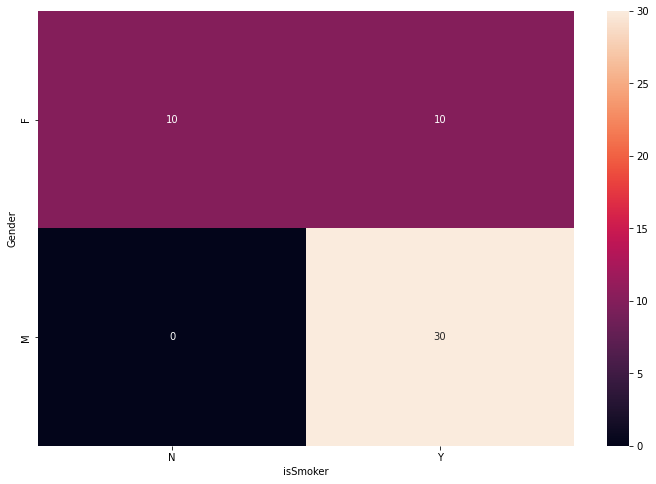

In [98]:
plt.figure(figsize=(12,8))
sns.heatmap(conti, annot=True)

In [99]:
stats.chi2_contingency(conti)

(15.755208333333334,
 7.208919288681039e-05,
 1,
 array([[ 4., 16.],
        [ 6., 24.]]))

End